### Diabetes Prediction Project

| Columns                  |Description
|--------------------------|-----------------------------------------------------------------------------------|
| Pregnancies              |Number of times pregnant                                                           |
| Glucose                  |Plasma glucose concentration for 2 hours in an oral glucose tolerance test         |
| BloodPressure            |Diastolic blood pressure (mm Hg)                                                   |
| SkinThickness            |Triceps skin fold thickness (mm)                                                   |
| Insulin                  |2-Hour serum insulin (mu U/ml)                                                     |
| BMI                      |Body mass index (weight in kg/(height in m)"2)                                     |
| DiabetesPedigreeFunction |Diabetes pedigree function                                                         |
| Age                      |Age (years)                                                                        |
| Outcome                  |Class variable (0 or 1) 268 of 768 are 1, the others are O                         |

#### L'ensemble de données Pima Indian Diabetes, provenant de l'Institut national du diabète et des maladies digestives et rénales, contient des informations sur 768 femmes d'une population près de Phoenix, en Arizona, aux États-Unis. Le résultat testé était le diabète, 258 ont été testés positifs et 500 négatifs. Par conséquent, il existe une variable cible (dépendante) et les 8 attributs  : grossesses, OGTT (Oral Glucose Tolerance Test), tension artérielle, épaisseur de la peau, insuline, IMC (indice de masse corporelle), âge, fonction du diabète généalogique.

### Installer TensorFlow et Keras

In [94]:
!pip install tensorflow
!pip install keras

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


### Importation de bibliothèques

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import numpy as np
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score,recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from matplotlib import colors
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras.layers import Input
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, regularizers

### Données

In [96]:
# Lecture d'un fichier
df = pd.read_csv('C:\\Users\\Salma\\Desktop\\Projet-SFE\\diabete disease\\Diabetes Mellitus Disease Prediction\\Pima Indians Diabetes Database.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:

df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Type de df

In [98]:
type(df)

pandas.core.frame.DataFrame

### Informations diverses

In [99]:
df.shape

(768, 9)

In [100]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [102]:
list(df)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

### Statistiques descriptives

In [103]:
df.describe().round(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.000
mean,3.8451,120.8945,69.1055,20.5365,79.7995,31.9926,0.4719,33.2409,0.349
std,3.3696,31.9726,19.3558,15.9522,115.2440,7.8842,0.3313,11.7602,0.477
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780,21.0000,0.000
25%,1.0000,99.0000,62.0000,0.0000,0.0000,27.3000,0.2438,24.0000,0.000
50%,3.0000,117.0000,72.0000,23.0000,30.5000,32.0000,0.3725,29.0000,0.000
75%,6.0000,140.2500,80.0000,32.0000,127.2500,36.6000,0.6262,41.0000,1.000
max,17.0000,199.0000,122.0000,99.0000,846.0000,67.1000,2.4200,81.0000,1.000


In [104]:
# Quantiles
quantiles = df.quantile([0.25, 0.5, 0.75])
display(quantiles)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.25,1.0,99.00,62.0,0.0,0.00,27.3,0.24375,24.0,0.0
0.50,3.0,117.00,72.0,23.0,30.50,32.0,0.37250,29.0,0.0
0.75,6.0,140.25,80.0,32.0,127.25,36.6,0.62625,41.0,1.0


### Tester les doublons

In [105]:
df.duplicated().sum()

0

### Suppression des doublons

In [106]:
df = df.drop_duplicates()

### Vérifier la présence de valeurs Null

In [107]:
null_values = df.isnull().sum()
print(null_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [108]:
# Compter le nombre de colonnes avec des zéros
count_zero_columns = (df == 0).sum(axis=0)

# Afficher les colonnes ayant au moins un zéro
zero_columns = count_zero_columns[count_zero_columns > 0]
print("Colonnes avec des zéros :\n", zero_columns)

# Afficher le nombre total de colonnes avec des zéros
total_zero_columns = zero_columns.shape[0]
print("Nombre total de colonnes avec des zéros :", total_zero_columns)

Colonnes avec des zéros :
 Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64
Nombre total de colonnes avec des zéros : 7


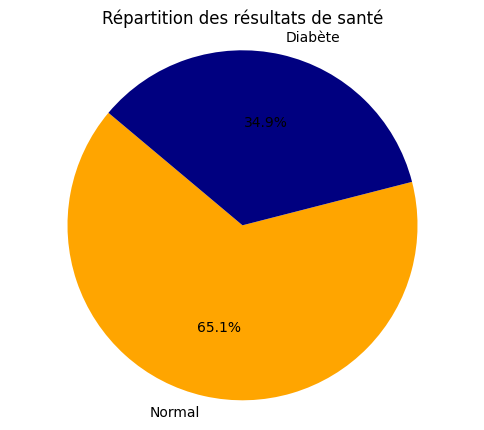

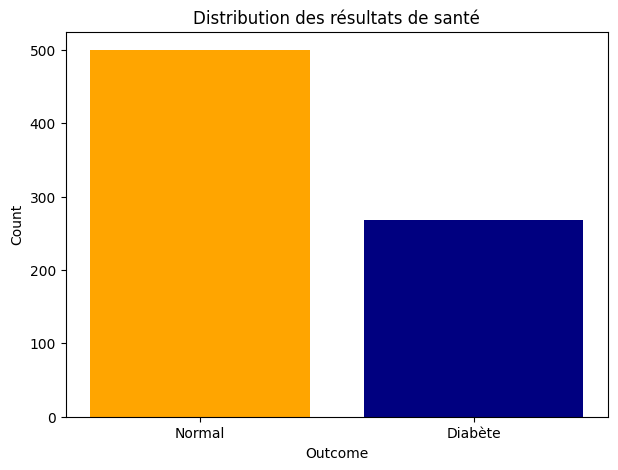

In [109]:
# Compter les occurrences pour chaque catégorie de l'issue ('Outcome')
outcome_counts = df['Outcome'].value_counts()
labels = outcome_counts.index.map({0: 'Normal', 1: 'Diabète'})
sizes = outcome_counts.values

# Couleurs pour les sections du graphique
colors = ['orange', 'navy']

# Création du graphique circulaire (pie chart)
plt.figure(figsize=(6, 5))

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Assure que le graphique soit circulaire
plt.title("Répartition des résultats de santé")
plt.savefig('pie_chart.png')  # Sauvegarder le graphique en format PNG
plt.show()

# Création de l'histogramme (bar chart)
plt.figure(figsize=(7, 5))

plt.bar(labels, sizes, color=colors)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title("Distribution des résultats de santé")
plt.savefig('bar_chart.png')  # Sauvegarder le graphique en format PNG
plt.show()

### Remplacement des valeurs égales à 0

In [110]:
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.0,43.1,2.288,33,1


### Dataset est déséquilibré

In [111]:
smote = SMOTE()
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [112]:
X,y = smote.fit_resample(df[['Pregnancies', 'Glucose', 'Insulin', 'BloodPressure', 'SkinThickness',
 'BMI', 'DiabetesPedigreeFunction', 'Age']],df['Outcome'])

In [113]:
X.shape , y.shape

((1000, 8), (1000,))

In [114]:
df = pd.concat([X,y],axis=1)
df.head()

,Pregnancies,Glucose,Insulin,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,30.5,72.0,35.000000,33.6,0.627,50,1
1,1,85.0,30.5,66.0,29.000000,26.6,0.351,31,0
2,8,183.0,30.5,64.0,20.536458,23.3,0.672,32,1
3,1,89.0,94.0,66.0,23.000000,28.1,0.167,21,0
4,0,137.0,168.0,40.0,35.000000,43.1,2.288,33,1


In [115]:
df.shape

(1000, 9)

In [116]:
X = df.drop(["Outcome"],axis = 1)
y = df["Outcome"]

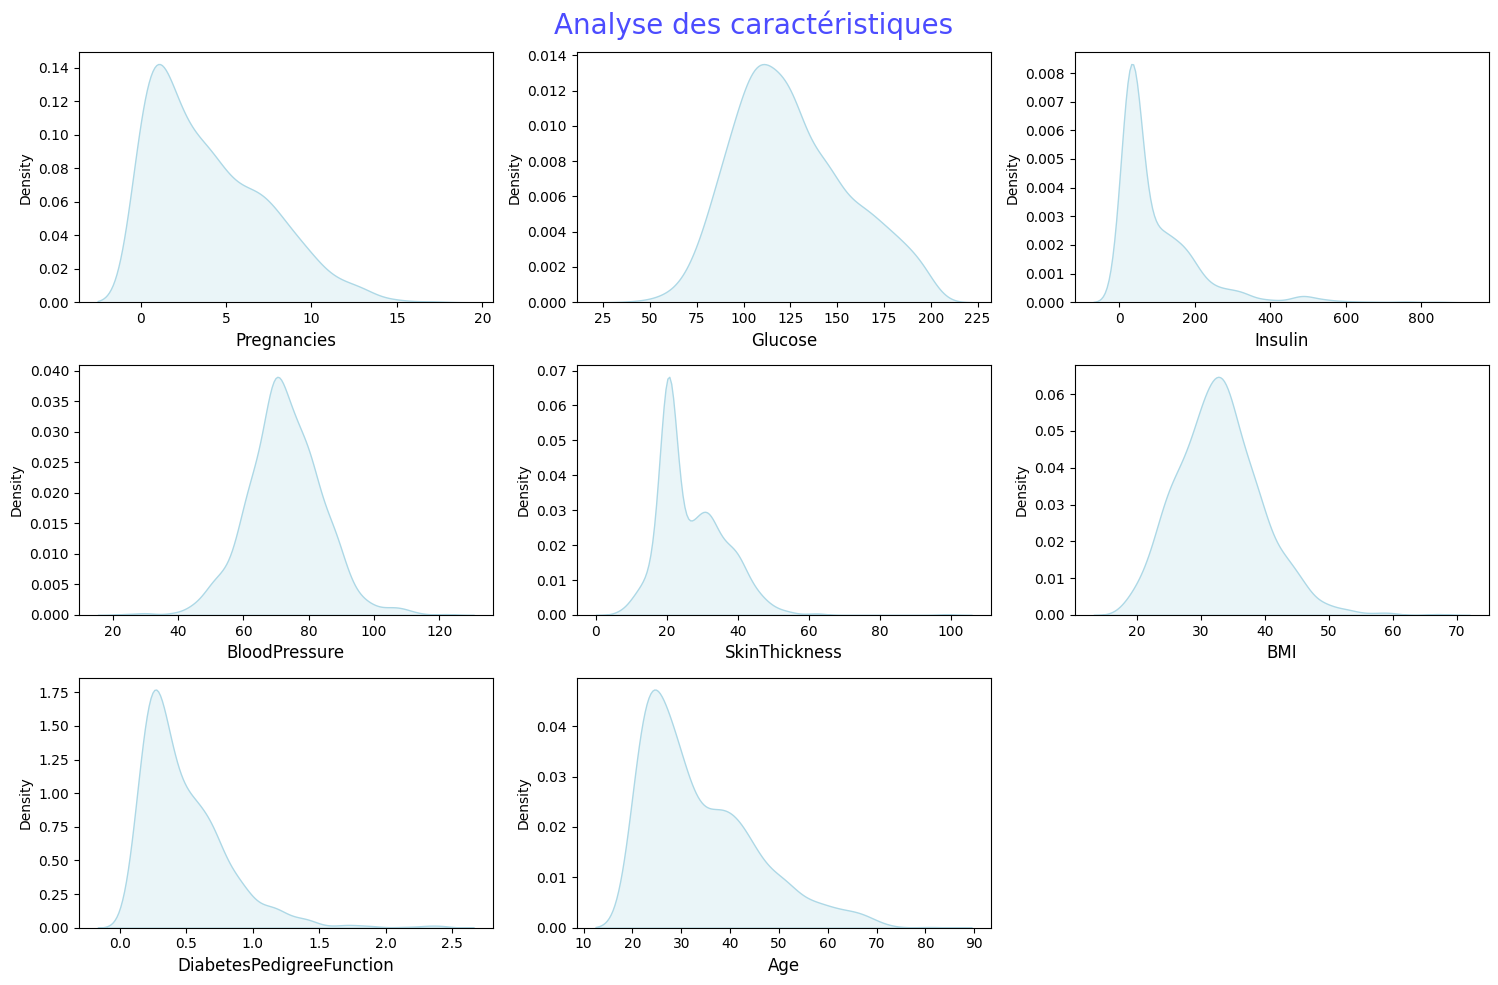

In [117]:
plt.figure(figsize=(15,10))
plt.suptitle("Analyse des caractéristiques",fontsize=20, alpha=0.7,c ='blue')
for i, col in enumerate(X.columns):
    fig = plt.subplot(3,3,i+1)
    sns.kdeplot(X[col],fill = True,color ='lightblue')
    plt.xlabel(col,fontsize=12)
plt.tight_layout()
plt.show()

### Création de Boxplot

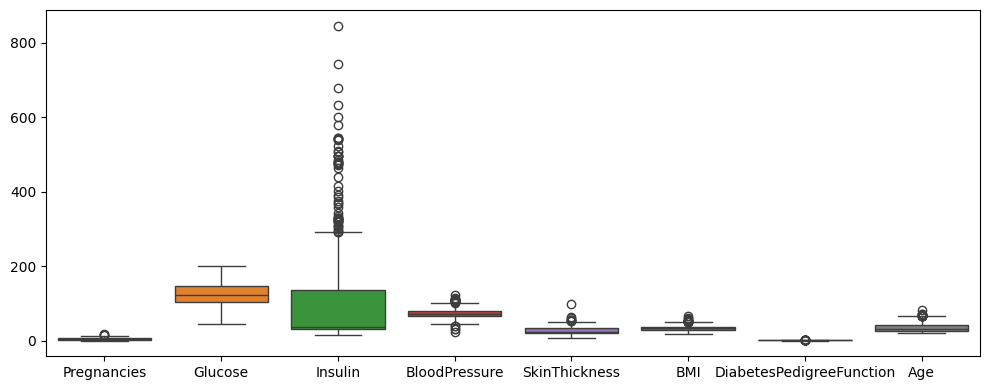

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(X)
plt.tight_layout()
plt.show()

### Correlation entre les caractéristiques

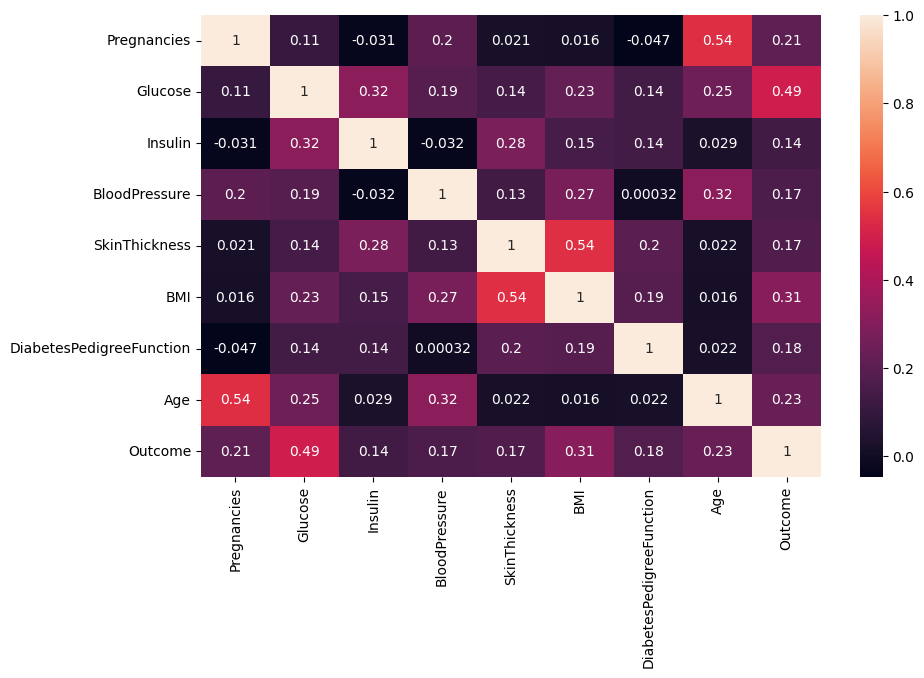

In [120]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True )
plt.show()

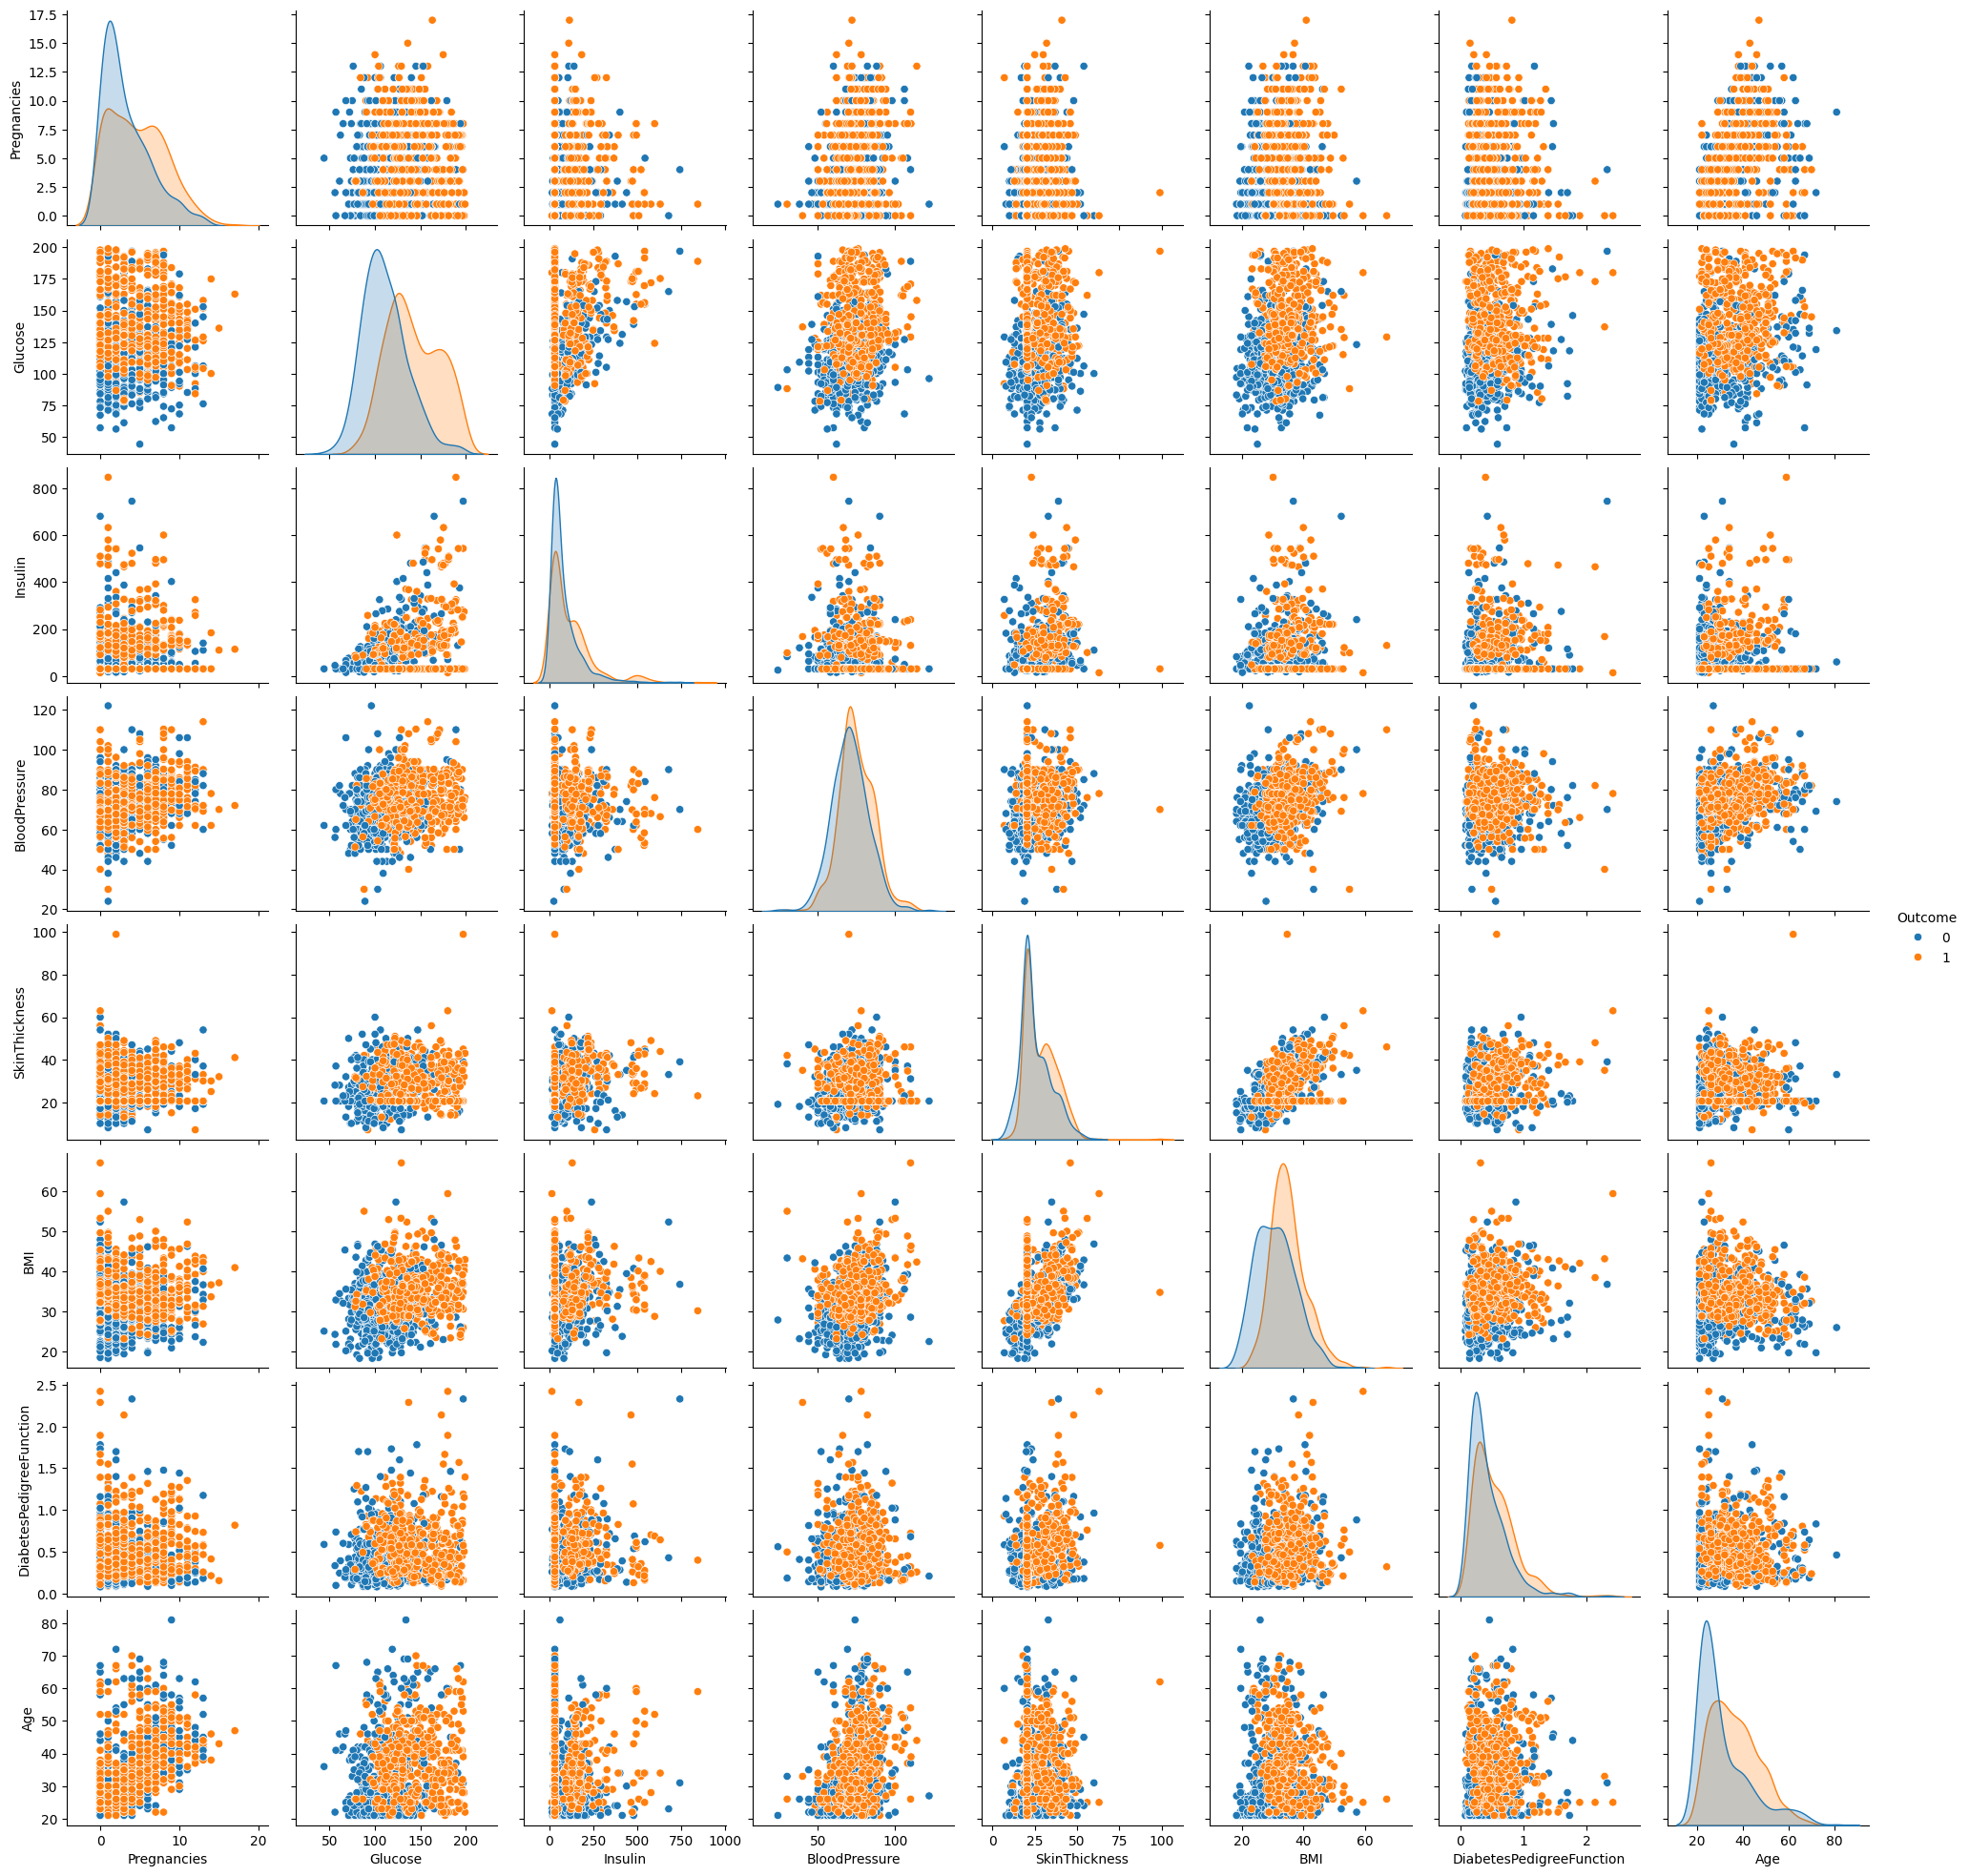

In [ ]:
sns.pairplot(df, hue='Outcome')

### Grouper les données par Outcome

In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,Insulin,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298,110.705367,83.188000,70.810008,25.373135,30.880066,0.429734,31.190
1,4.696,142.060935,115.191272,74.911981,28.514974,35.085714,0.541470,36.578


### Normalisation de données

In [ ]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age']
# copy df dataframe to df_norm to do not affect the original data
df_norm = df.copy()
# normalize df_norm dataframe 
df_norm[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min())/ (x.max() - x.min()) )
x = df_norm.drop(columns='Outcome')
y = df_norm['Outcome']
df_norm.head(5)

,Pregnancies,Glucose,Insulin,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.019832,0.489796,0.304348,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.019832,0.428571,0.239130,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.019832,0.408163,0.147135,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.096154,0.428571,0.173913,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.185096,0.163265,0.304348,0.509202,0.943638,0.200000,1


### Régression logistique

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Définir les paramètres pour la recherche sur grille
parameters = {'C': np.linspace(0.0001, 100, 40)}

# Effectuer la recherche sur grille pour trouver les meilleurs paramètres pour le modèle de régression logistique
grid_search = GridSearchCV(LogisticRegression(max_iter=3000, class_weight={0: 0.35, 1: 0.65}), parameters, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Meilleurs paramètres : ', grid_search.best_params_)
print('Meilleur score : ', grid_search.best_score_)

# Créer et entraîner le modèle de régression logistique avec les meilleurs paramètres
logit_model = LogisticRegression(max_iter=3000, class_weight={0: 0.35, 1: 0.65}, C=grid_search.best_params_['C'])
logit_model.fit(X_train, y_train)

# Évaluer le modèle
train_score = logit_model.score(X_train, y_train)
test_score = logit_model.score(X_test, y_test)

print('Score sur l\'ensemble d\'entraînement : ', train_score)
print('Score sur l\'ensemble de test : ', test_score)

Meilleurs paramètres :  {'C': 2.5642}
Meilleur score :  0.7582089552238805
Score sur l'ensemble d'entraînement :  0.7701492537313432
Score sur l'ensemble de test :  0.7303030303030303


In [ ]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.600310
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      992
Method:                           MLE   Df Model:                            7
Date:                Mon, 20 May 2024   Pseudo R-squ.:                  0.1339
Time:                        22:34:23   Log-Likelihood:                -600.31
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                 1.232e-36
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1309      0.026      5.110      0.000       0.081

### Naive Bayes

Rappel : 0.65625
Precision: 0.7446808510638298
Accuracy: 0.7242424242424242
F1-score: 0.6976744186046512


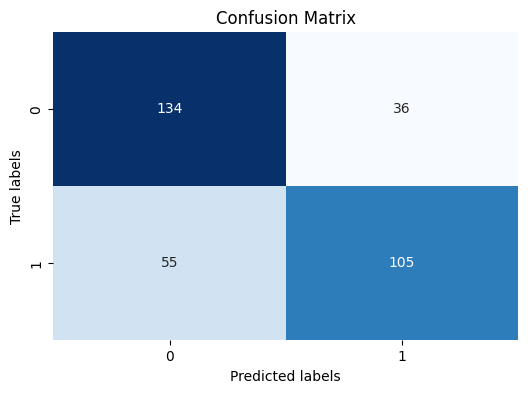

In [ ]:
# Créer un modèle Naive Bayes
nb_model = GaussianNB()

# Entraîner le modèle sur les données d'entraînement
nb_model.fit(X_train, y_train)

# Prédire les étiquettes sur les données de test
y_pred = nb_model.predict(X_test)

# Calculer l'accuracy, précision et le F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
# Calcul du rappel
recall = recall_score(y_test, y_pred)

print("Rappel :", recall)
print("Precision:", precision)
print("Accuracy:", accuracy)
print("F1-score:", f1)

# Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Affichage du rapport de classification
class_report = classification_report(y_test, y_pred)
print("Classification Report :\n", class_report)

Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.79      0.75       170
           1       0.74      0.66      0.70       160

    accuracy                           0.72       330
   macro avg       0.73      0.72      0.72       330
weighted avg       0.73      0.72      0.72       330



### Arbre de décision

In [ ]:
train, test = train_test_split(df, test_size = 0.8, random_state=42)
target = train["Outcome"]
feature = train[train.columns[0:8]]
feat_names = train.columns[0:8]
target_classes = ['0','1'] 
print(test)

     Pregnancies     Glucose  Insulin  BloodPressure  SkinThickness  \
521            3  124.000000    130.0      80.000000      33.000000   
737            8   65.000000     30.5      72.000000      23.000000   
740           11  120.000000    150.0      80.000000      37.000000   
660           10  162.000000     30.5      84.000000      20.536458   
411            1  112.000000    176.0      72.000000      30.000000   
..           ...         ...      ...            ...            ...   
619            0  119.000000     30.5      69.105469      20.536458   
855            0  138.854585     30.5      69.105469      20.536458   
803            2  162.000000     30.5      55.935002      37.672083   
645            2  157.000000    440.0      74.000000      35.000000   
846           11  130.075511     30.5      91.164432      20.536458   

           BMI  DiabetesPedigreeFunction  Age  Outcome  
521  33.200000                  0.305000   26        0  
737  32.000000                  0

Accuracy: 0.7125
Precision: 0.7648309178743962
Recall: 0.7141526710877486
F1 Score: 0.6985662236900736
[[199 204]
 [ 26 371]]
Decision Tree accuracy:  0.7125
DecisionTree Feature ranking:
1. feature Glucose (0.684878)
2. feature BMI (0.159702)
3. feature Age (0.105299)
4. feature SkinThickness (0.050121)
5. feature DiabetesPedigreeFunction (0.000000)
6. feature BloodPressure (0.000000)
7. feature Insulin (0.000000)
8. feature Pregnancies (0.000000)


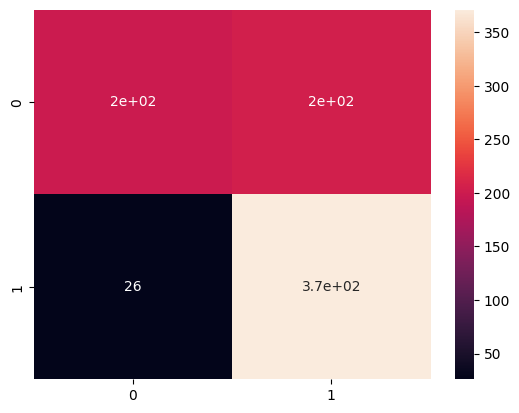

In [ ]:
from sklearn.metrics import classification_report

model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_= model.fit(feature,target)
test_input=test[test.columns[0:8]]
expected = test["Outcome"]
predicted = model.predict(test_input)

report = classification_report(expected, predicted, output_dict=True)
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

conf = metrics.confusion_matrix(expected, predicted)
print(conf)
print("Decision Tree accuracy: ",model.score(test_input,expected))
dtreescore = model.score(test_input,expected)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)

#Feature Importance DecisionTreeClassifier
importance = model.feature_importances_
indices = np.argsort(importance)[::-1]
print("DecisionTree Feature ranking:")
for f in range(feature.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feat_names[indices[f]], importance[indices[f]]))



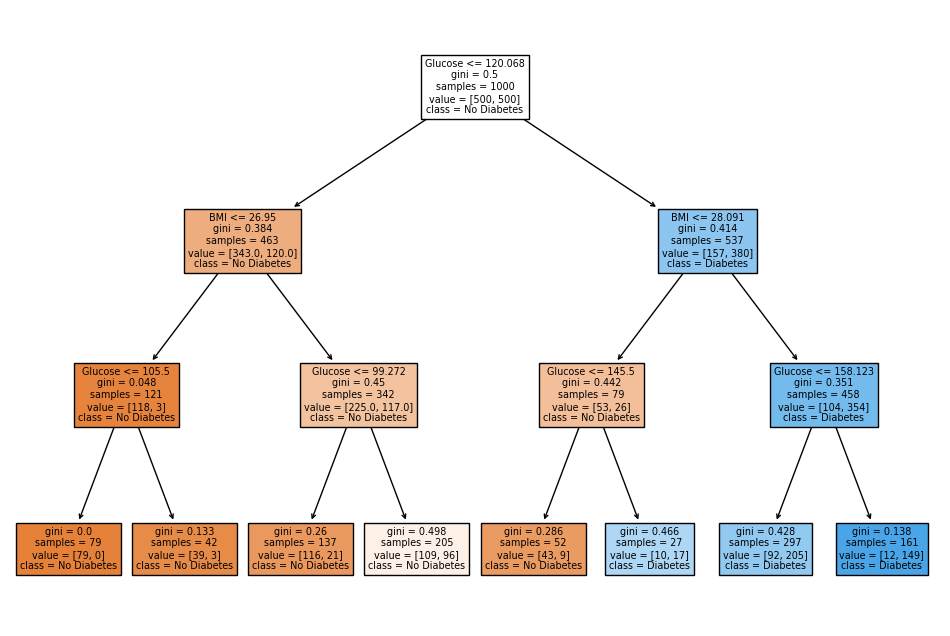

In [ ]:
# Déclaration de l'arbre de décision avec une profondeur maximale de 3
clf = DecisionTreeClassifier(max_depth=3)

# Entrainement de l'arbre de décision sur les données de votre dataframe df
X = df.drop(columns='Outcome')  # Les features
y = df['Outcome']               # La colonne cible

clf.fit(X, y)
plt.figure(figsize=(12, 8))
# Affichage de l'arbre de décision obtenu après entraînement
plot_tree(clf, feature_names=df.columns[:-1], class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rfc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       170
           1       0.74      0.84      0.79       160

    accuracy                           0.78       330
   macro avg       0.78      0.78      0.78       330
weighted avg       0.79      0.78      0.78       330

Confusion Matrix:
 [[122  48]
 [ 25 135]]
Training Score:
 100.0
Mean Squared Error:
 0.22121212121212122
R2 score is:
 0.1143382352941178


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

77.87878787878788


### KNN

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialisation du modèle KNN avec k=9
knn_model = KNeighborsClassifier(n_neighbors=7)

# Entraînement du modèle
knn_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = knn_model.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

# Calcul de la précision
precision = precision_score(y_test, y_pred)
print("Precision :", precision)

# Calcul du rappel
recall = recall_score(y_test, y_pred)
print("Recall :", recall)

# Calcul du F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score :", f1)

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", conf_matrix)

# Affichage du rapport de classification
class_report = classification_report(y_test, y_pred)
print("Classification Report :\n", class_report)


Accuracy : 0.7636363636363637
Precision : 0.7204301075268817
Recall : 0.8375
F1-score : 0.7745664739884393
Confusion Matrix :
 [[118  52]
 [ 26 134]]
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.69      0.75       170
           1       0.72      0.84      0.77       160

    accuracy                           0.76       330
   macro avg       0.77      0.77      0.76       330
weighted avg       0.77      0.76      0.76       330



### Deep neural networks (DNN)

In [ ]:
scaler = MinMaxScaler()

scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [ ]:
model = models.Sequential()
hold_prob = 0.0

beta = 1e-6
alpha = 0.05

lr_decay = 0.01

iterations = 100

validation_split = 0.5
opt_momentum = 0.8
opt = optimizers.SGD(learning_rate=alpha, decay=lr_decay, momentum=opt_momentum, nesterov=True)

model.add(layers.Dense(input_dim=8, units=8, activation='relu'))
model.add(layers.Dense(units=8, activation='relu', kernel_regularizer=regularizers.l2(beta)))

model.add(layers.Dropout(hold_prob))

model.add(layers.Dense(units=8, activation='relu', kernel_regularizer=regularizers.l2(beta)))
model.add(layers.Dropout(hold_prob))
model.add(layers.Dense(units=8, activation='relu', kernel_regularizer=regularizers.l2(beta)))

model.add(layers.Dropout(hold_prob))
model.add(layers.Dense(units=2, activation='softmax'))

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=scaled_x_train, y=y_train, epochs=iterations, validation_split=validation_split)

# Prédiction sur l'ensemble de test
y_pred_probabilities = model.predict(scaled_x_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Calcul de la précision
precision = precision_score(y_test, y_pred)
print("Precision :", precision)

# Calcul du rappel
recall = recall_score(y_test, y_pred)
print("Recall :", recall)

# Calcul du F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score :", f1)




c:\Python311\Lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4679 - loss: 0.7088 - val_accuracy: 0.6060 - val_loss: 0.6834
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6243 - loss: 0.6832 - val_accuracy: 0.6627 - val_loss: 0.6694
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6365 - loss: 0.6709 - val_accuracy: 0.6299 - val_loss: 0.6555
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6360 - loss: 0.6627 - val_accuracy: 0.6388 - val_loss: 0.6303
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6734 - loss: 0.6412 - val_accuracy: 0.7343 - val_loss: 0.5969
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6463 - loss: 0.6177 - val_accuracy: 0.7373 - val_loss: 0.5594
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7216 - loss: 0.5511 - val_accuracy: 0.7433 - val_loss: 0.5589
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5905 - val_accuracy: 0.6896 -

In [ ]:
# Obtenir les probabilités de chaque classe pour les données de test
predicted_probabilities = model.predict(scaled_x_test)
# Sélectionner la classe avec la probabilité la plus élevée pour chaque échantillon
predicted_classes = np.argmax(predicted_probabilities, axis=1)
# Afficher le rapport de classification
print(classification_report(y_test, predicted_classes))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       170
           1       0.75      0.68      0.71       160

    accuracy                           0.73       330
   macro avg       0.73      0.73      0.73       330
weighted avg       0.73      0.73      0.73       330



### CNN

In [ ]:
import numpy as np
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Reshape, Conv2DTranspose, BatchNormalization, Activation, Conv2D, Flatten, \
    Conv1D, GlobalMaxPooling1D, Conv3D, GlobalMaxPooling3D, LSTM, MaxPooling2D
from keras.utils import to_categorical
from keras_preprocessing import sequence
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# split into input (X) and output (y) variables
X = df.iloc[:,0:8] # Sélection des colonnes 0 à 7 pour les caractéristiques
y = df.iloc[:,8]

# split training_set = 80%, test_set = 20%
# use random_state for shuffle dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

# train_set = 60%, validation_set = 20% , test_set = 20%
# create validation_set by split 20% of training_set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=2)

# create zero column with numpy
X_train = np.column_stack((X_train, np.zeros((len(X_train),1))))
X_test = np.column_stack((X_test, np.zeros((len(X_test),1))))
X_val = np.column_stack((X_val, np.zeros((len(X_val),1))))

# reshape input data to be able do extract feature.
# reshape for CNN (instance, row, column, channel)
X_train = X_train.reshape(len(X_train),3,3,1)
X_test = X_test.reshape(len(X_test),3,3,1)
X_val = X_val.reshape(len(X_val),3,3,1)

# convert output class to category
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

# define the keras model
model = Sequential()

model.add(Conv2D(64, 2, activation='relu', input_shape=(3,3,1)))
model.add(MaxPooling2D(pool_size=1))
model.add(Conv2D(32, 2, activation='relu'))
model.add(MaxPooling2D(pool_size=1))
model.add(Flatten())
model.add(Dense(100, input_dim=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
# summarize of model (explanation model layer)
print(model.summary())

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train, y_train, validation_data=(X_val, y_val,), epochs=250, batch_size=32, verbose=2)

# evaluate the model
scores = model.evaluate(X_train, y_train, verbose=0)
print('====================')
print('Result of validation set')
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
print('====================')

# predict using test_set
value = model.predict(X_test)
y_pred = np.argmax(value,axis=1)
y_true = np.argmax(y_test,axis=1)

# confusion matrix
result_CF_matrix = confusion_matrix(y_true, y_pred, labels=[0,1])
TP = result_CF_matrix[0,0]
FN = result_CF_matrix[0,1]
FP = result_CF_matrix[1,0]
TN = result_CF_matrix[1,1]
print('              Confusion Matrix')
print('                Yes      No')
print('Actual Yes  %6d' %TP+'   %6d'%FN)
print('Actual No   %6d' %FP+'   %6d'%TN)

# Evaluation method from confusion matrix
ACC = (TP + TN)/(TP+FN+FP+TN)
Sensitivity = TP/(TP+FP)
Specificity = TN/(FN+TN)
Recall = TP/(TP+FN)
print('Accuracy = %.2f%%' % (ACC*100))
print('Specificity = %.2f%%' % (Specificity*100))
print('Precision = %.2f%%' % (Sensitivity*100))
print('Recall = %.2f%%' % (Recall*100))

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 2, 2, 64)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 1, 1, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 100)            │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,146 (86.51 KB)

 Trainable params: 22,146 (86.51 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/250
20/20 - 1s - 72ms/step - accuracy: 0.5156 - loss: 1.0643 - val_accuracy: 0.4875 - val_loss: 0.6842
Epoch 2/250
20/20 - 0s - 8ms/step - accuracy: 0.5453 - loss: 0.7006 - val_accuracy: 0.5063 - val_loss: 0.6848
Epoch 3/250
20/20 - 0s - 8ms/step - accuracy: 0.5813 - loss: 0.6697 - val_accuracy: 0.5500 - val_loss: 0.6693
Epoch 4/250
20/20 - 0s - 8ms/step - accuracy: 0.6031 - loss: 0.6554 - val_accuracy: 0.5500 - val_loss: 0.6930
Epoch 5/250
20/20 - 0s - 8ms/step - accuracy: 0.6219 - loss: 0.6654 - val_accuracy: 0.5813 - val_loss: 0.6557
Epoch 6/250
20/20 - 0s - 7ms/step - accuracy: 0.6594 - loss: 0.6428 - val_accuracy: 0.6125 - val_loss: 0.6580
Epoch 7/250
20/20 - 0s - 8ms/step - accuracy: 0.6531 - loss: 0.6258 - val_accuracy: 0.6000 - val_loss: 0.6538
Epoch 8/250
20/20 - 0s - 8ms/step - accuracy: 0.6594 - loss: 0.6092 - val_accuracy: 0.5312 - val_loss: 0.6891
Epoch 9/250
20/20 - 0s - 7ms/step - accuracy: 0.5938 - loss: 0.6343 - val_accuracy: 0.5938 - val_loss: 0.6784
Epoc

In [ ]:
# Affichage du rapport de classification
class_report = classification_report(y_test, y_pred)
print("Classification Report :\n", class_report)

Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       170
           1       0.76      0.72      0.74       160

    accuracy                           0.75       330
   macro avg       0.76      0.75      0.75       330
weighted avg       0.75      0.75      0.75       330



<Axes: >

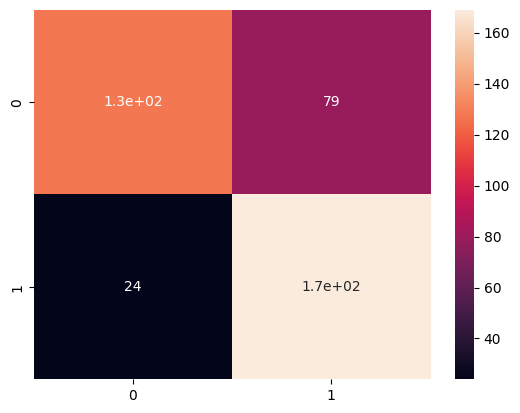

In [ ]:
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)